In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from PIL import Image
import os
import cv2
from keras import preprocessing
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from skimage import exposure

In [6]:
trainingDataHEM = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_1/cropped_hem'
trainingDataALL = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_1/cropped_all'
trainingDataAugHEM = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_1/aug_hem'

validationDataHEM = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_0/hem'
validationDataALL = 'C:/Users/v4run/OneDrive/Desktop/Datasets/C-NMC_Leukemia/training_data/fold_0/all'

In [7]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.bmp')]

In [92]:
def crop_img(images, display=False):
    mask = images == 0

    coords = np.array(np.nonzero(~mask))
    top_left = np.min(coords, axis=1)
    bottom_right = np.max(coords, axis=1)

    cropped_image = images[top_left[0]:bottom_right[0],top_left[1]:bottom_right[1]]
    return cropped_image

In [93]:
def dataImport(path,pathType):
    imageList = []
    for i,j in zip(pathType,path):
        if i not in ['ALL','HEM']:
            raise ValueError("Entry must be either 'ALL' or 'HEM'")
        else:
            if i == 'HEM':
                loadPath = get_imlist(j) 
                for paths in loadPath:
                    imageList.append({'Images':Image.open(paths),'Labels':0,'CroppedImages':None})
            else:
                loadPath = get_imlist(j) 
                for paths in loadPath:
                    imageList.append({'Images':Image.open(paths),'Labels':1,'CroppedImages':None})
    imageData = pd.DataFrame(imageList)
    imageData['CroppedImages'] = imageData['Images'].apply(lambda images: crop_img(np.array(images)))
    return imageData

In [94]:
images = dataImport([trainingDataAugHEM],['HEM'])

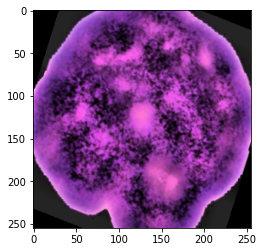

In [95]:
imshow(images['CroppedImages'][0])

In [96]:
def plot_image_and_intensity(image):
    if len(image.shape) == 3:
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        image_gray = image

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    # Display the grayscale image
    ax[0].imshow(image_gray, cmap='gray')
    ax[0].set_title('Grayscale Image')

    # Display the intensity values
    im = ax[1].imshow(image_gray, cmap='jet', interpolation='nearest')
    ax[1].set_title('Intensity Values')
    fig.colorbar(im, ax=ax[1])

    plt.show()

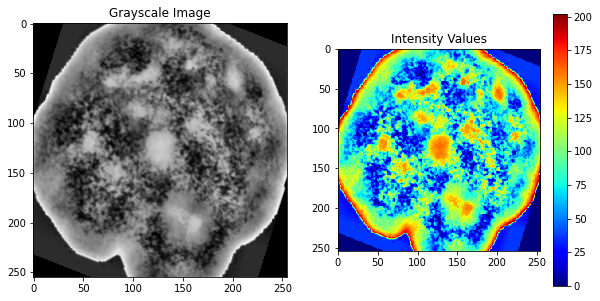

In [97]:
plot_image_and_intensity(images['CroppedImages'][0])